In [37]:
import sys, os
import pandas as pd
import numpy as np
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.insert(1, '../scripts')
root = os.getcwd()

from TwintDataMiner import TwintDataMiner
from PandasDataCleaner import PandasDataCleaner
from TextBlobSentiment import TextBlobSentiment
from Visualisation import Visualisation
from GMM import GMM

In [38]:
tdm = TwintDataMiner()
attributes = ["id", "tweet", "place", "date"]

before_df = pd.DataFrame()

# before
for i in range(1, 16):
    if i < 10:
        path = f"../data/Final/before/tweets_march_2020_03_10_0{i}-00-00.csv"
    else:
        path = f"../data/Final/before/tweets_march_2020_03_10_{i}-00-00.csv"

    try:
        before_df = before_df.append(tdm.getPandasDataFrame(attributes, path))
    except FileNotFoundError:
        print(path)
        pass
        
# tweetsFile = "../data/1000TweetsPerDay.csv"

../data/Final/before/tweets_march_2020_03_10_01-00-00.csv
../data/Final/before/tweets_march_2020_03_10_02-00-00.csv
../data/Final/before/tweets_march_2020_03_10_03-00-00.csv
../data/Final/before/tweets_march_2020_03_10_04-00-00.csv
../data/Final/before/tweets_march_2020_03_10_05-00-00.csv
../data/Final/before/tweets_march_2020_03_10_06-00-00.csv
../data/Final/before/tweets_march_2020_03_10_07-00-00.csv
../data/Final/before/tweets_march_2020_03_10_08-00-00.csv
../data/Final/before/tweets_march_2020_03_10_09-00-00.csv
../data/Final/before/tweets_march_2020_03_10_10-00-00.csv
../data/Final/before/tweets_march_2020_03_10_11-00-00.csv
../data/Final/before/tweets_march_2020_03_10_12-00-00.csv
../data/Final/before/tweets_march_2020_03_10_13-00-00.csv
../data/Final/before/tweets_march_2020_03_10_14-00-00.csv
../data/Final/before/tweets_march_2020_03_10_15-00-00.csv


In [19]:
print(before_df.shape)
before_df.head

(553292, 4)


<bound method NDFrame.head of                         id                                              tweet  \
0                       id                                              tweet   
1      1237181373946966018  Trump discusses economics surrounding coronavi...   
2      1237181373896671232  MLB's locker room ban is first step in dealing...   
3      1237181372898344960  Oil prices plunge as coronavirus fears soar an...   
4      1237181372579618817  As governments and companies try to reduce the...   
...                    ...                                                ...   
56613  1237378894258483200  Doctor in Italy gives emotional account of wor...   
56614  1237378894199762944   https://gazetacentral.blogspot.com/2020/03/os...   
56615  1237378894023581696  Great example of global youth playing importan...   
56616  1237378893713203202  #Awareness 😷 🇬🇧 Sixth UK coronavirus death con...   
56617  1237378893683793922  Yo creo que a este de ha atacado el Coronaviru...  

In [20]:
after_df = pd.DataFrame()

# after
for i in range(1, 24):
    if i < 10:
        path = f"../data/Final/after/tweets_march_2020_03_12_0{i}-00-00.csv"
    else:
        path = f"../data/Final/after/tweets_march_2020_03_12_{i}-00-00.csv"

    try:
        after_df = after_df.append(tdm.getPandasDataFrame(attributes, path))
    except FileNotFoundError:
        print(path)
        pass

../data/Final/after/tweets_march_2020_03_12_01-00-00.csv
../data/Final/after/tweets_march_2020_03_12_05-00-00.csv
../data/Final/after/tweets_march_2020_03_12_06-00-00.csv
../data/Final/after/tweets_march_2020_03_12_07-00-00.csv
../data/Final/after/tweets_march_2020_03_12_08-00-00.csv
../data/Final/after/tweets_march_2020_03_12_09-00-00.csv
../data/Final/after/tweets_march_2020_03_12_10-00-00.csv


In [21]:
print(after_df.shape)
after_df.head

(1049371, 4)


<bound method NDFrame.head of                         id                                              tweet  \
0                       id                                              tweet   
1      1237921249482797056  not tom hanks having the corona virus i'll som...   
2      1237921249445240832  #coronavirus #virus #sickpeople  https://www.i...   
3      1237921249445232640                   Netflix and chills. #coronavirus   
4      1237921249277468673  en 1 semana y media nos contagiamos de coronav...   
...                    ...                                                ...   
65996  1238230727352881160  Coronavirus: al carnaval de Basilea se lo llev...   
65997  1238230727298334722  Emergenza Coronavirus. Il tecnico dell'Arsenal...   
65998  1238230727260622848  Eventos nacionais e internacionais são cancela...   
65999  1238230727126384640  no que capaz me soplas y me contagias el coron...   
66000  1238230727126327298  Coronavirus is getting serious now. This isn’t...  

In [22]:
before_df.drop_duplicates(subset='id')
print(before_df.shape)
print("----")
after_df.drop_duplicates(subset='id')
print(after_df.shape)

(553292, 4)
----
(1049371, 4)


In [23]:
def cleandf(df):
    pdc = PandasDataCleaner()
    
    df  = pdc.detectLanguage(df, 'tweet', 'lang') 
    df = df.loc[df['lang'] == 'en']
    df = pdc.cleanTweets(df, 'tweet')


#     df = df.reset_index(drop=True)

    return df

In [24]:
import pickle

def get_pickle_object(name):
    frame = pd.read_pickle(f"{name}.pkl")
    pkl = get_full_frame(frame, str(name))
    obj = pickle.loads(pkl[0])
    return obj

def get_full_frame(frame, name):
    return list(frame[name][0:len(frame.index)])

def store_as_pickle(name, obj):
    pkl = pickle.dumps(obj)
    gmm_frame = pd.DataFrame({str(name): pkl}, index=[0])
    gmm_frame.to_pickle(f"./{name}.pkl")

In [33]:
final_bow =['PPE',
 'afraid',
 'air',
 'alarmed',
 'alarming',
 'ante la crisis',
 'anxiety',
 'anxious',
 'apprehensive',
 'atmosphere',
 'brutal',
 'brutal new',
 'cascade warning heard unheeded',
 'chaos',
 'chaotic',
 'charity',
 'clean air',
 'clean water',
 'comfort',
 'coronavirus fear',
 'crise du coronavirus',
 'crisis',
 'crisis del',
 'crisis del coronavirus',
 'danger',
 'dangerous',
 'dead',
 'death',
 'disaster',
 'disastrous',
 'distress',
 'distressed',
 "don't panic",
 'donations',
 'earth',
 'el tema del coronavirus',
 'encourage',
 'encouraging',
 'environment',
 'evil',
 'exaggerate',
 'exaggerating',
 'exaggeration',
 'faint',
 'fantastic',
 'fearful',
 'fearschaos',
 'fighter',
 'fitness',
 'flabbergast',
 'flabbergasted',
 'flatten',
 'food wastage',
 'freaked',
 'free',
 'fright',
 'frightened',
 'genocide',
 'gloves',
 'government funds',
 'gratitude',
 'grief',
 'grievance',
 'gruesome',
 'happy',
 'harm',
 'healing',
 'health issue',
 'heartbreaking',
 'hell',
 'helpless',
 'honor',
 'hope',
 'horrendous',
 'horrific',
 'horrify',
 'horrifying',
 'hospital',
 'humanity',
 'improvement',
 'improving',
 'issue weakened immune',
 'job pay proposal help',
 'kill',
 'killed',
 'killingthreat',
 'kills',
 'la crise',
 'la crisis',
 'la crisis del',
 'la crisis del coronavirus',
 'life-threatening',
 'masks',
 'meditation',
 'member single family killing',
 'mild',
 'murder',
 'negative',
 'nervous',
 'not panic',
 'not serious',
 'nurses',
 'optimism',
 'optimistic',
 'outbreak cascade warning heard',
 'overcome',
 'overreact',
 'overreacted',
 'overreacting',
 'ozone',
 'panic',
 'panick',
 'panicked',
 'panicking',
 'panicky',
 'paranoid',
 'pasta',
 'phobia',
 'positive',
 'problem',
 'progress',
 'promise',
 'promising',
 'protect',
 'proud',
 'quality',
 'ran out',
 'rattle',
 'rattled',
 'recover',
 'recovery',
 'relief',
 'respect',
 'rice',
 'risk',
 'sad',
 'sadness',
 'scared',
 'scarefear',
 'scarier',
 'scariest',
 'scarily',
 'shock',
 'shocked',
 'shocking',
 'shockingly',
 'spanish flu',
 'stop aggravation',
 'strength',
 'strong',
 'stronger',
 'successfully',
 'support',
 'surreal',
 'terrible',
 'terrified threats',
 'terror',
 'tests',
 'thank you',
 'thanks',
 'threatening',
 'together',
 'toilet paper',
 'tragic',
 'travel alert',
 'trust',
 'unbearable',
 'unhygienic',
 'unnerve',
 'unnerved',
 'unnerving',
 'unserious',
 'upset',
 'upsetting',
 'upsets',
 'upsettingly',
 'vaccine',
 'warned coronavirus effect private meeting',
 'warning',
 'warning heard unheeded',
 'wonderful',
 'worried',
 'worryingly',
 'worry',
 'worst possible leader deal coronavirus',
 '⚠️',
 '😡',
 '😢',
 '😩',
 '😭',
 '😳']

In [34]:
from LDA import LDA
from pprint import pprint

lda_before_orig = LDA()
lda_after_orig = LDA()

lda_before_bow = LDA()
lda_after_bow = LDA()

In [35]:
def process_docs(df, lda):
    processed_docs = []
    count = 0
    bow_corpus = []
    
    tempdf = df.reset_index(drop=True)

    tempdf.sort_values("id", inplace=True) 

    # cleaning and dropping duplicate values
    tempdf.drop_duplicates(subset=["tweet"],inplace=True)
    tempdf = cleandf(tempdf)

    # lemmatise and tokenise
    return tempdf['tweet'].map(str).map(lda.preprocess)

In [36]:
before_docs = process_docs(before_df, lda_before_bow)
after_docs = process_docs(after_df, lda_after_bow)

KeyboardInterrupt: 

In [ ]:
# Personalised BOW
lemmatised_vocab = pd.DataFrame()
lemmatised_vocab['column'] = [final_bow]
print(lemmatised_vocab)
lda_before_bow.dict_from_vocab(doc=lemmatised_vocab.iloc[0])
lda_after_bow.dict_from_vocab(doc=lemmatised_vocab.iloc[0])

In [ ]:
# Original
lda_before_orig.dict_from_vocab(doc=before_docs)
lda_after_orig.dict_from_vocab(doc=after_docs)

In [11]:
# Store before and after docs
store_as_pickle("before_docs", before_docs)
store_as_pickle("after_docs", after_docs)

In [ ]:
#Store lda objects
store_as_pickle("lda_before_orig", lda_before_orig)
store_as_pickle("lda_after_orig", lda_after_orig)
store_as_pickle("lda_before_bow", lda_before_bow)
store_as_pickle("lda_after_bow", lda_after_bow)

In [ ]:
#calculate corpus'
bow_corpus_before_bow = lda_before_bow.generateBagOfWords(docs=before_docs)
bow_corpus_after_bow = lda_after_bow.generateBagOfWords(docs=after_docs)

bow_corpus_before_orig = lda_before_orig.generateBagOfWords(docs=before_docs)
bow_corpus_after_orig = lda_after_orig.generateBagOfWords(docs=after_docs)

In [ ]:
# store corpus'
store_as_pickle(name="bow_corpus_before_bow", obj=bow_corpus_before_bow)
store_as_pickle(name="bow_corpus_after_bow", obj=bow_corpus_after_bow)

store_as_pickle(name="bow_corpus_before_orig", obj=bow_corpus_before_orig)
store_as_pickle(name="bow_corpus_after_orig", obj=bow_corpus_after_orig)

In [34]:
# calculate tfidfs
corpus_tfidf_before_orig = lda_before_orig.tf_idf(bow_corpus=bow_corpus_before_orig)
corpus_tfidf_after_orig = lda_after_orig.tf_idf(bow_corpus=bow_corpus_after_orig)

corpus_tfidf_before_bow = lda_before_bow.tf_idf(bow_corpus=bow_corpus_before_bow)
corpus_tfidf_after_bow = lda_after_bow.tf_idf(bow_corpus=bow_corpus_after_bow)

Before
2 topics:

Topic: 0 Word: 0.123*"death" + 0.093*"kill" + 0.054*"risk" + 0.051*"dead" + 0.030*"hope" + 0.009*"problem" + 0.008*"trust" + 0.008*"protect" + 0.008*"air" + 0.008*"earth"


Topic: 1 Word: 0.128*"death" + 0.049*"protect" + 0.031*"kill" + 0.030*"dead" + 0.021*"panic" + 0.012*"risk" + 0.010*"relief" + 0.010*"danger" + 0.010*"grief" + 0.010*"harm"


------------  ------------
After
2 topics:

Topic: 0 Word: 0.045*"death" + 0.036*"free" + 0.034*"kill" + 0.030*"hope" + 0.028*"panic" + 0.021*"dead" + 0.020*"danger" + 0.016*"protect" + 0.016*"hell" + 0.015*"afraid"


Topic: 1 Word: 0.071*"hope" + 0.039*"panic" + 0.032*"hell" + 0.022*"death" + 0.021*"kill" + 0.021*"support" + 0.016*"risk" + 0.015*"murder" + 0.015*"free" + 0.013*"respect"





Before
3 topics:

Topic: 0 Word: 0.111*"risk" + 0.020*"death" + 0.016*"trust" + 0.016*"harm" + 0.016*"mild" + 0.016*"free" + 0.015*"respect" + 0.009*"kill" + 0.008*"dead" + 0.007*"protect"


Topic: 1 Word: 0.131*"dead" + 0.021*"death" + 0

In [ ]:
# store tfidfs

store_as_pickle(name="corpus_tfidf_before_orig", obj=corpus_tfidf_before_orig)
store_as_pickle(name="corpus_tfidf_after_orig", obj=corpus_tfidf_after_orig)

store_as_pickle(name="corpus_tfidf_before_bow", obj=corpus_tfidf_before_bow)
store_as_pickle(name="corpus_tfidf_after_bow", obj=corpus_tfidf_after_bow)

In [ ]:
def train_lda(no_topics, corpus_tfidf, lda):

    print(f"{no_topics} topics:\n")
    lda_model_tfidf = lda.train(corpus_tfidf, no_topics, workers=4)
    
    for idx, topic in lda_model_tfidf.print_topics(-1):
        print('Topic: {} Word: {}'.format(idx, topic))
        print("\n")
    return lda_model_tfidf

In [ ]:
for i in range (2, 5):
    print("Before")
    before = train_lda(i, corpus_tfidf_before_orig, lda_before_orig)
    print("------------  ------------")
    print("After")
    after = train_lda(i, corpus_tfidf_after_orig, lda_after_orig)
    print("\n\n")

In [ ]:
store_as_pickle(name="after-orig", obj=after)
store_as_pickle(name="before-orig", obj=before)

In [ ]:
for i in range (2, 5):
    print("Before")
    before = train_lda(i, corpus_tfidf_before_bow, lda_before_bow)
    print("------------  ------------")
    print("After")
    after = train_lda(i, corpus_tfidf_after_bow, lda_after_bow)
    print("\n\n")

In [ ]:
store_as_pickle(name="after-bow", obj=after)
store_as_pickle(name="before-bow", obj=before)

In [35]:
from collections import Counter
import matplotlib.colors as mcolors

def plot(model, docs):
    topics = model.show_topics(formatted=False)
    data_flat = [w for w_list in docs for w in w_list]
    counter = Counter(data_flat)

    out = []
    for i, topic in topics:
        for word, weight in topic:
            out.append([word, i , weight, counter[word]])

    df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

    # Plot Word Count and Weights of Topic Keywords
    fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
    cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
    for i, ax in enumerate(axes.flatten()):
        ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
        ax_twin = ax.twinx()
        ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
        ax.set_ylabel('Word Count', color=cols[i])
        ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
        ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
        ax.tick_params(axis='y', left=False)
        ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
        ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

    fig.tight_layout(w_pad=2)    
    fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
    plt.show()

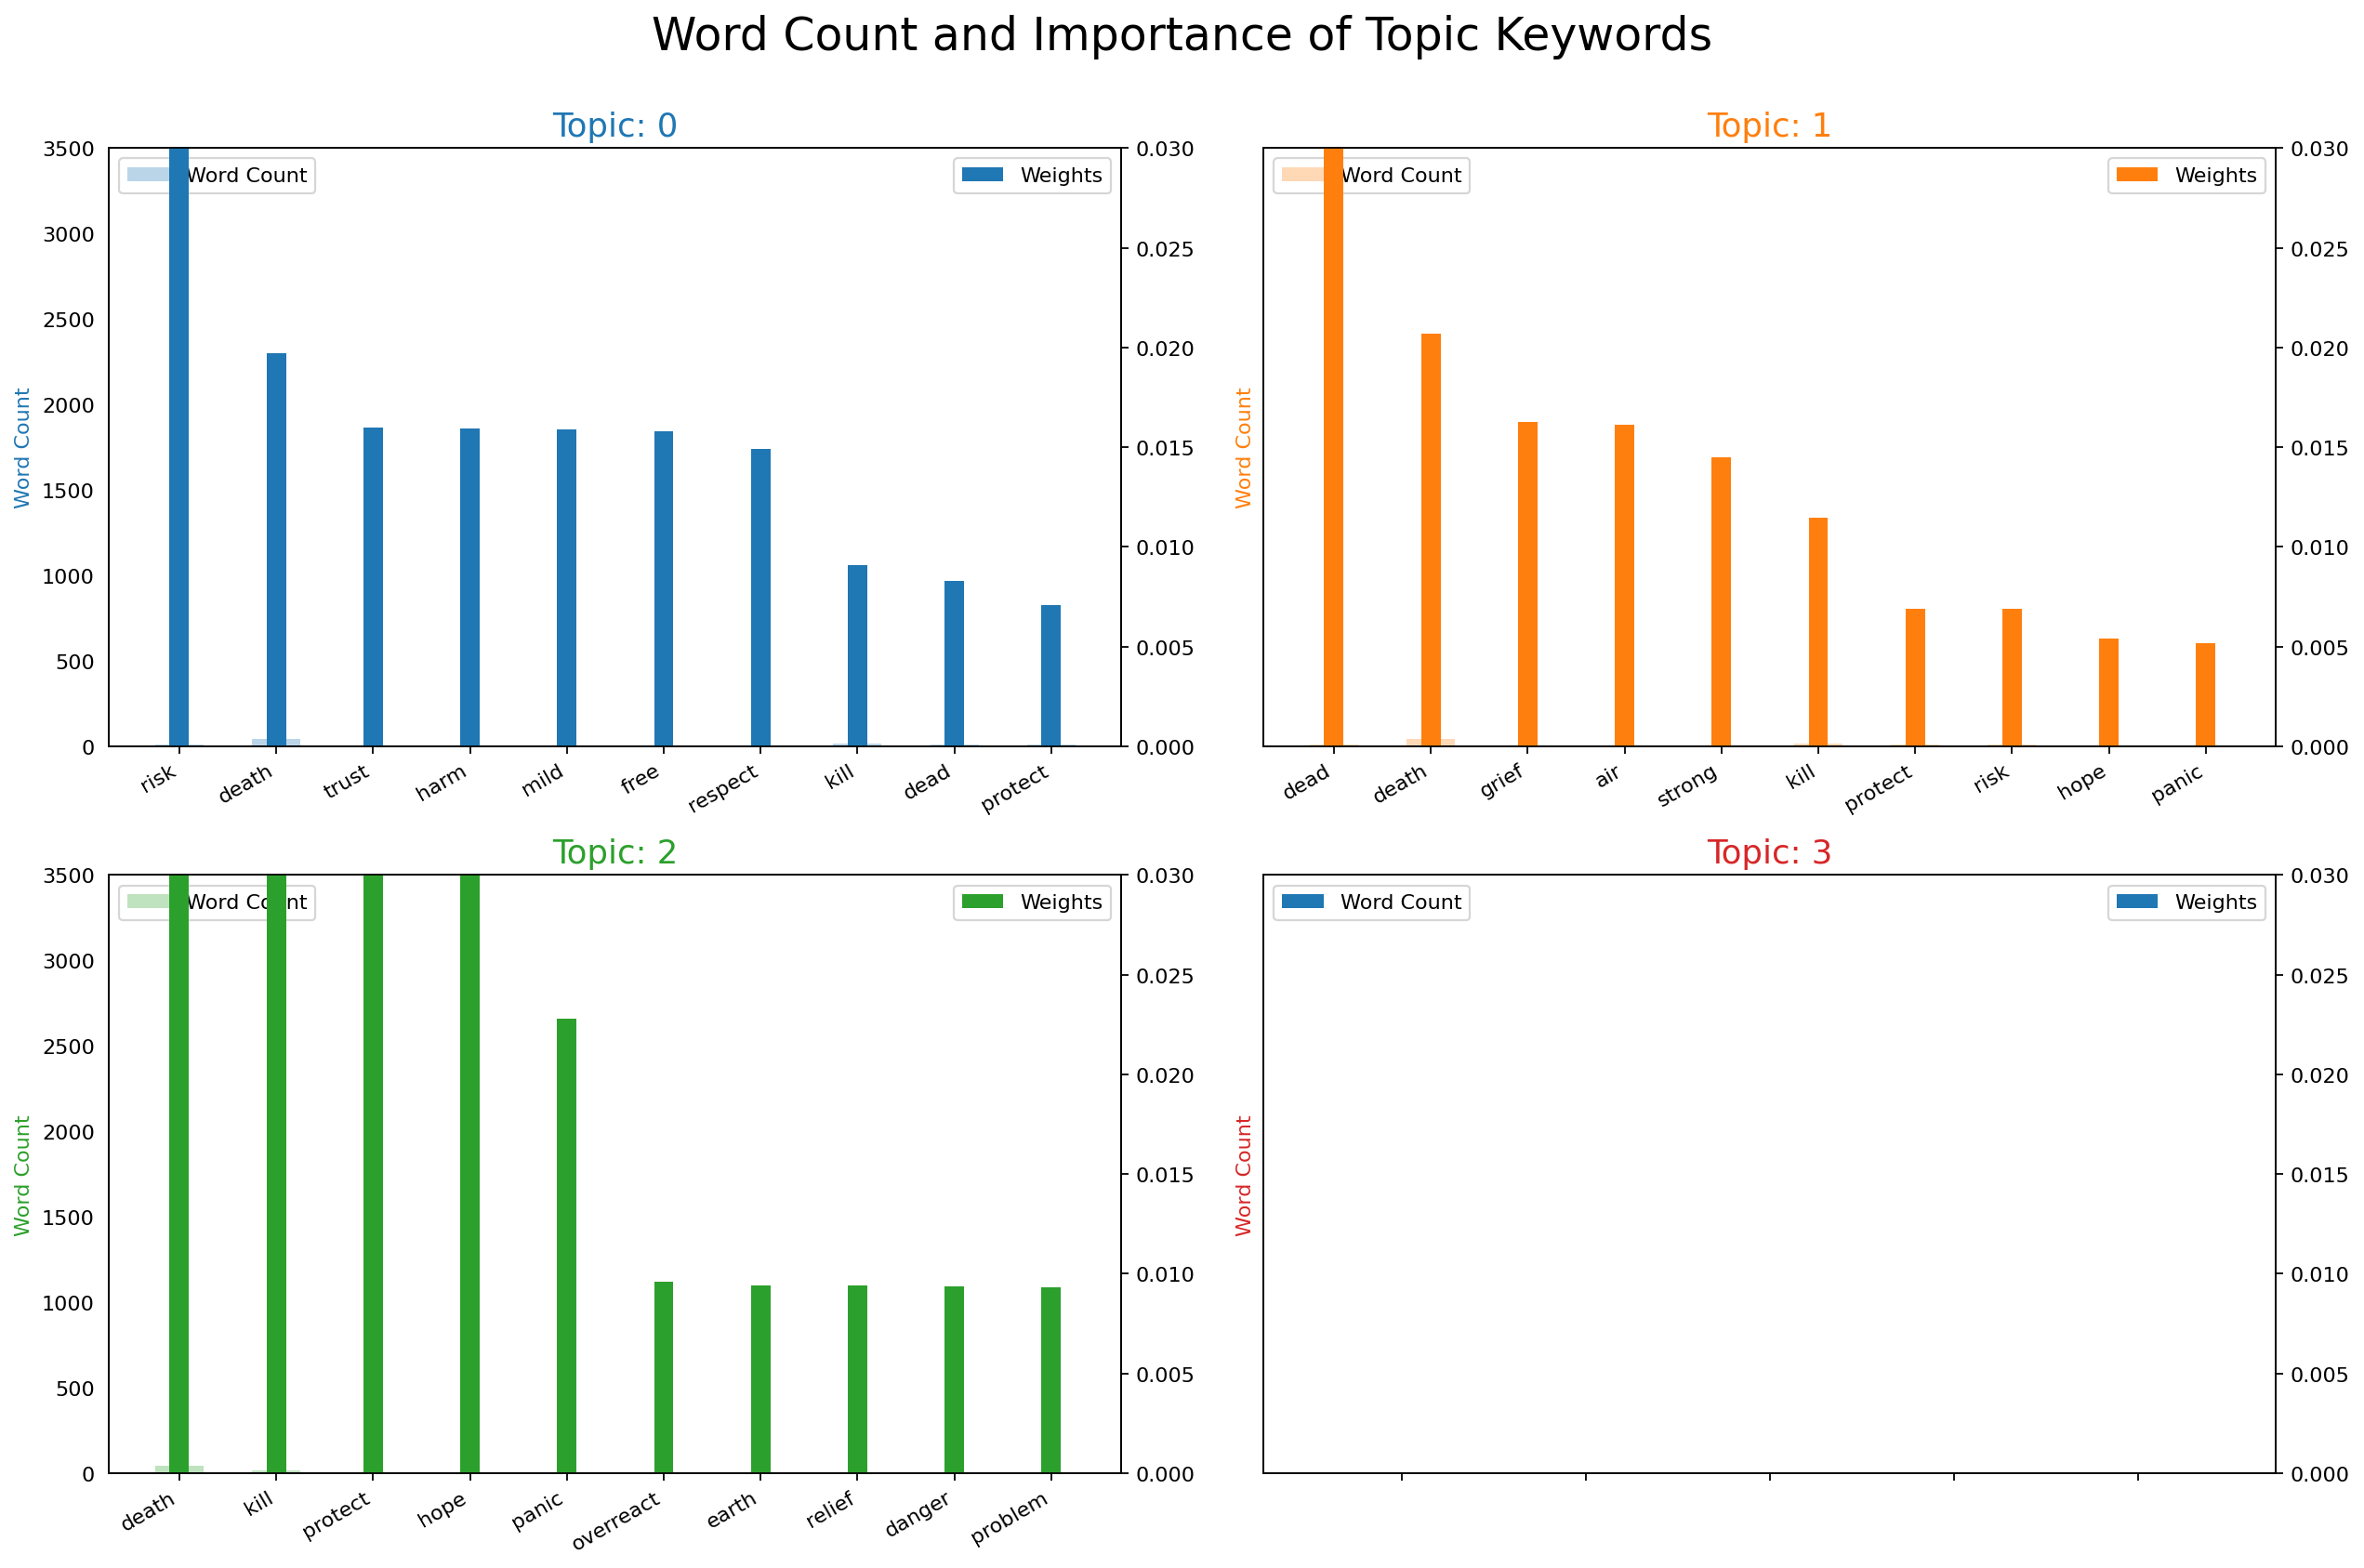

In [36]:
plot(model=start, docs=start_docs)

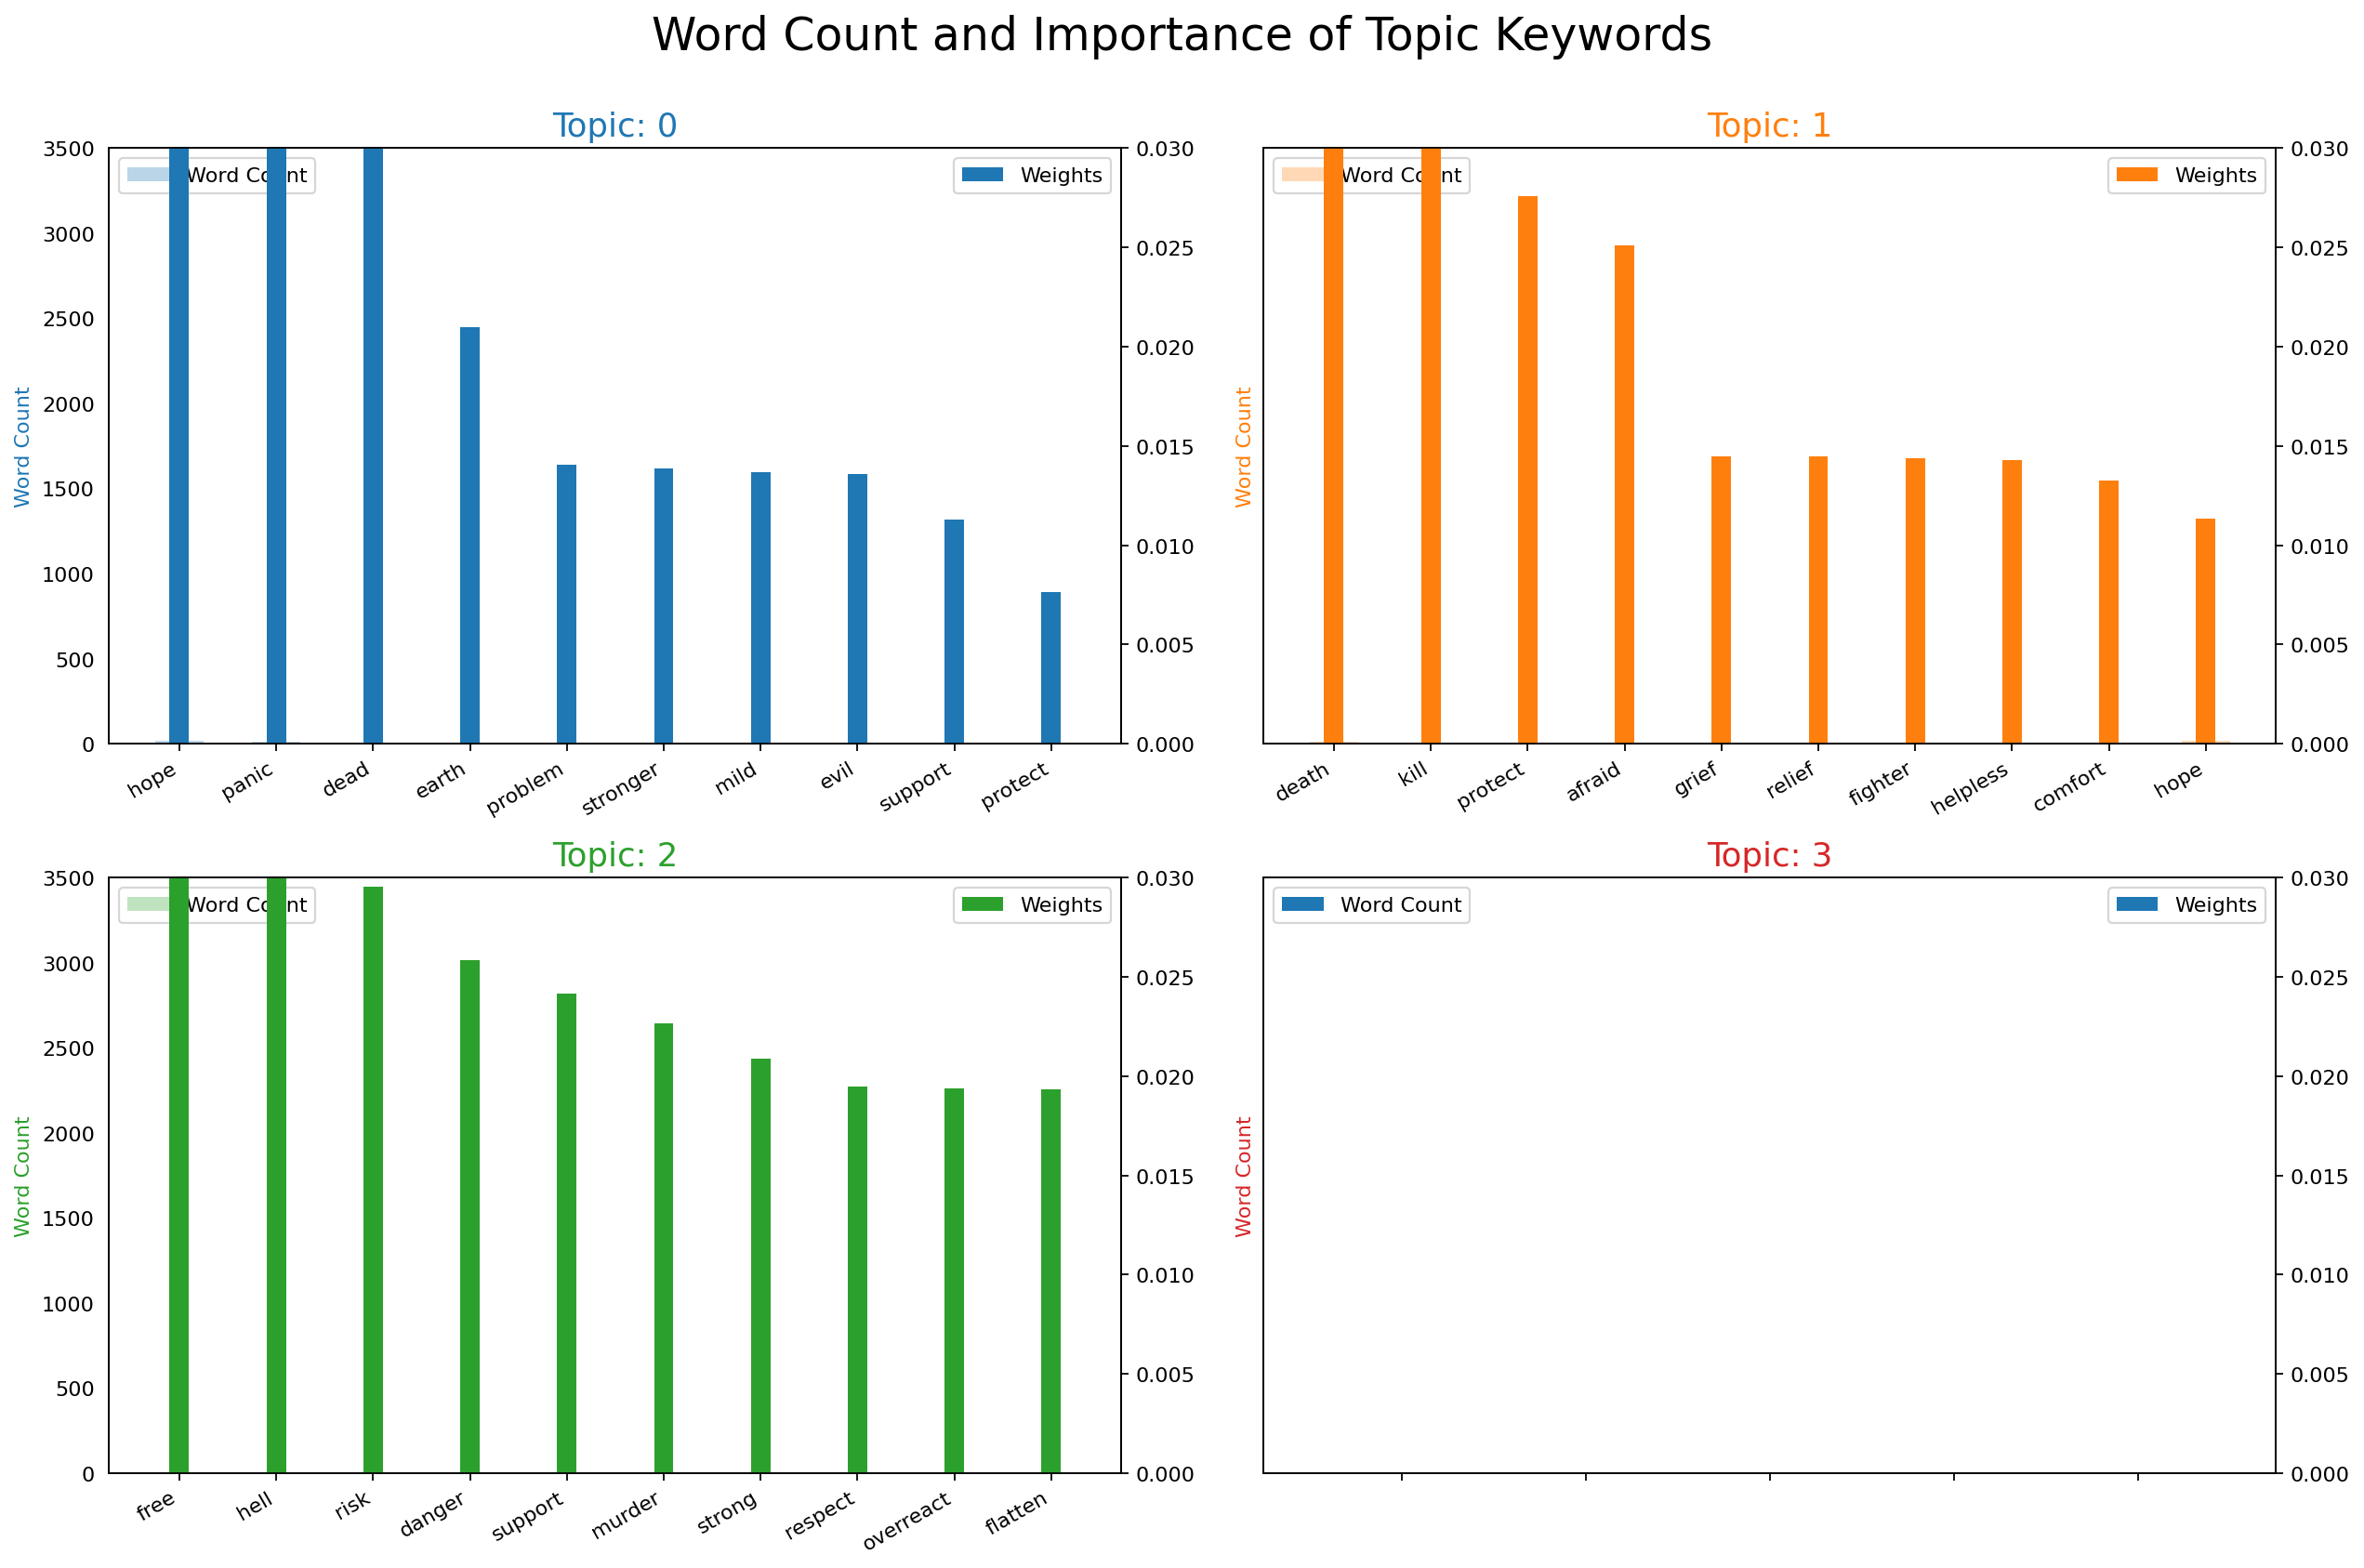

In [37]:
plot(model=end, docs=end_docs)

In [ ]:
    
# Song notes:
    # increase the number of topics -> should invide the topics further. We don't really have a guaranteed 
    # analysis with the number of topics
    # run with diff number of topics and provide analysis to suggest why we think the model picks up these topics
    # e.g. 2 topics with movies - drama & action. 4 topics adventure, drama, romance sci-fi
    # we are trying to draw connections

    # we should assume what the topic would be based on the weightings on the words

    # print("------------ BOW ------------")

    # lda_model_bow = lda.train(bow_corpus, no_topics)
    # for idx, topic in lda_model_bow.print_topics(-1):
    #     print('Topic: {} \nWords: {}'.format(idx, topic))


    # 1. Keep the words we are using, figure out the reason why people are panicking
    #     a) what they have been panicking over time? this will give further analysis.
    # 2. Increase BOG with positive and negative e.g gathering, reopen

    # try and put positive words in Gaussian Mixture Models

In [11]:
vocab = ['death', 'deaths', 'ventilator', 'ventilators', 'crisis', 'scared', 'tragedy', 'struggling']
bowMatrix = np.empty((1, len(vocab)), int)
gmm = GMM()
#generate bag of words for each day and add to matrix
for j in range(1,5):
    for i in range(1,32):
        if(not((j == 1 and i < 10) or (j == 2 and i > 29) or (j == 4 and i > 6))):
            date = "2020-0" + str(j) + "-" + str(i).zfill(2)
#             print(date)
            tempdf = df[df.date == date].copy()
            tempdf = tempdf.reset_index(drop=True)

            tempdf.sort_values("id", inplace=True) 
  
            # dropping duplicate values 
            tempdf.drop_duplicates(subset=["tweet"],inplace=True)
            pdc = PandasDataCleaner()
            tempdf  = pdc.detectLanguage(tempdf, 'tweet', 'lang')
            tempdf = tempdf.loc[tempdf['lang'] == 'en']
            tempdf = pdc.cleanTweets(tempdf, 'tweet')
            tempdf = tempdf[:250]
            
            bow = gmm.generateBagOfWords(tempdf, 'tweet', vocab=vocab)
            #get total bag of words for day
            panicRow = np.sum(bow, axis=0)
            bowMatrix = np.append(bowMatrix, np.reshape(panicRow, (1, len(vocab))), axis=0)
#             print(bowMatrix)
            
#delete row created for initialisation          
bowMatrix = np.delete(bowMatrix, (0), axis=0)
print(bowMatrix.shape)
print(bowMatrix)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [

KeyboardInterrupt: 

In [7]:
panic = gmm.modelFromBow(bowMatrix)

NameError: name 'gmm' is not defined

In [8]:
print(panic)

NameError: name 'panic' is not defined

In [9]:
onePanic = panic[:, 0]
print(onePanic)

NameError: name 'panic' is not defined

In [10]:
plt.plot(onePanic)
plt.show()

NameError: name 'plt' is not defined